## Get Data

In [1]:
from sklearn.preprocessing import StandardScaler
import random
import numpy as np
import pandas as pd

file_name = 'who.csv'
data = pd.read_csv(file_name)


columns_of_interest = [
    'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 
    'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 
    'HIV/AIDS', 'GDP', 'Life expectancy', 'Schooling'
]

data = data[columns_of_interest]
data = data.dropna()
print(data.head())

input = data.drop('Life expectancy', axis=1)
output = data['Life expectancy']

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Life expectancy  Schooling  
0  584.259210             65.0      

/var/folders/7z/xfnbx4d91bgcmc6rjrxtrzbc0000gn/T/ipykernel_69285/2558391614.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Normalize Data

In [2]:
scaler = StandardScaler()
input = pd.DataFrame(scaler.fit_transform(input), columns=input.columns)

## Visualize Data

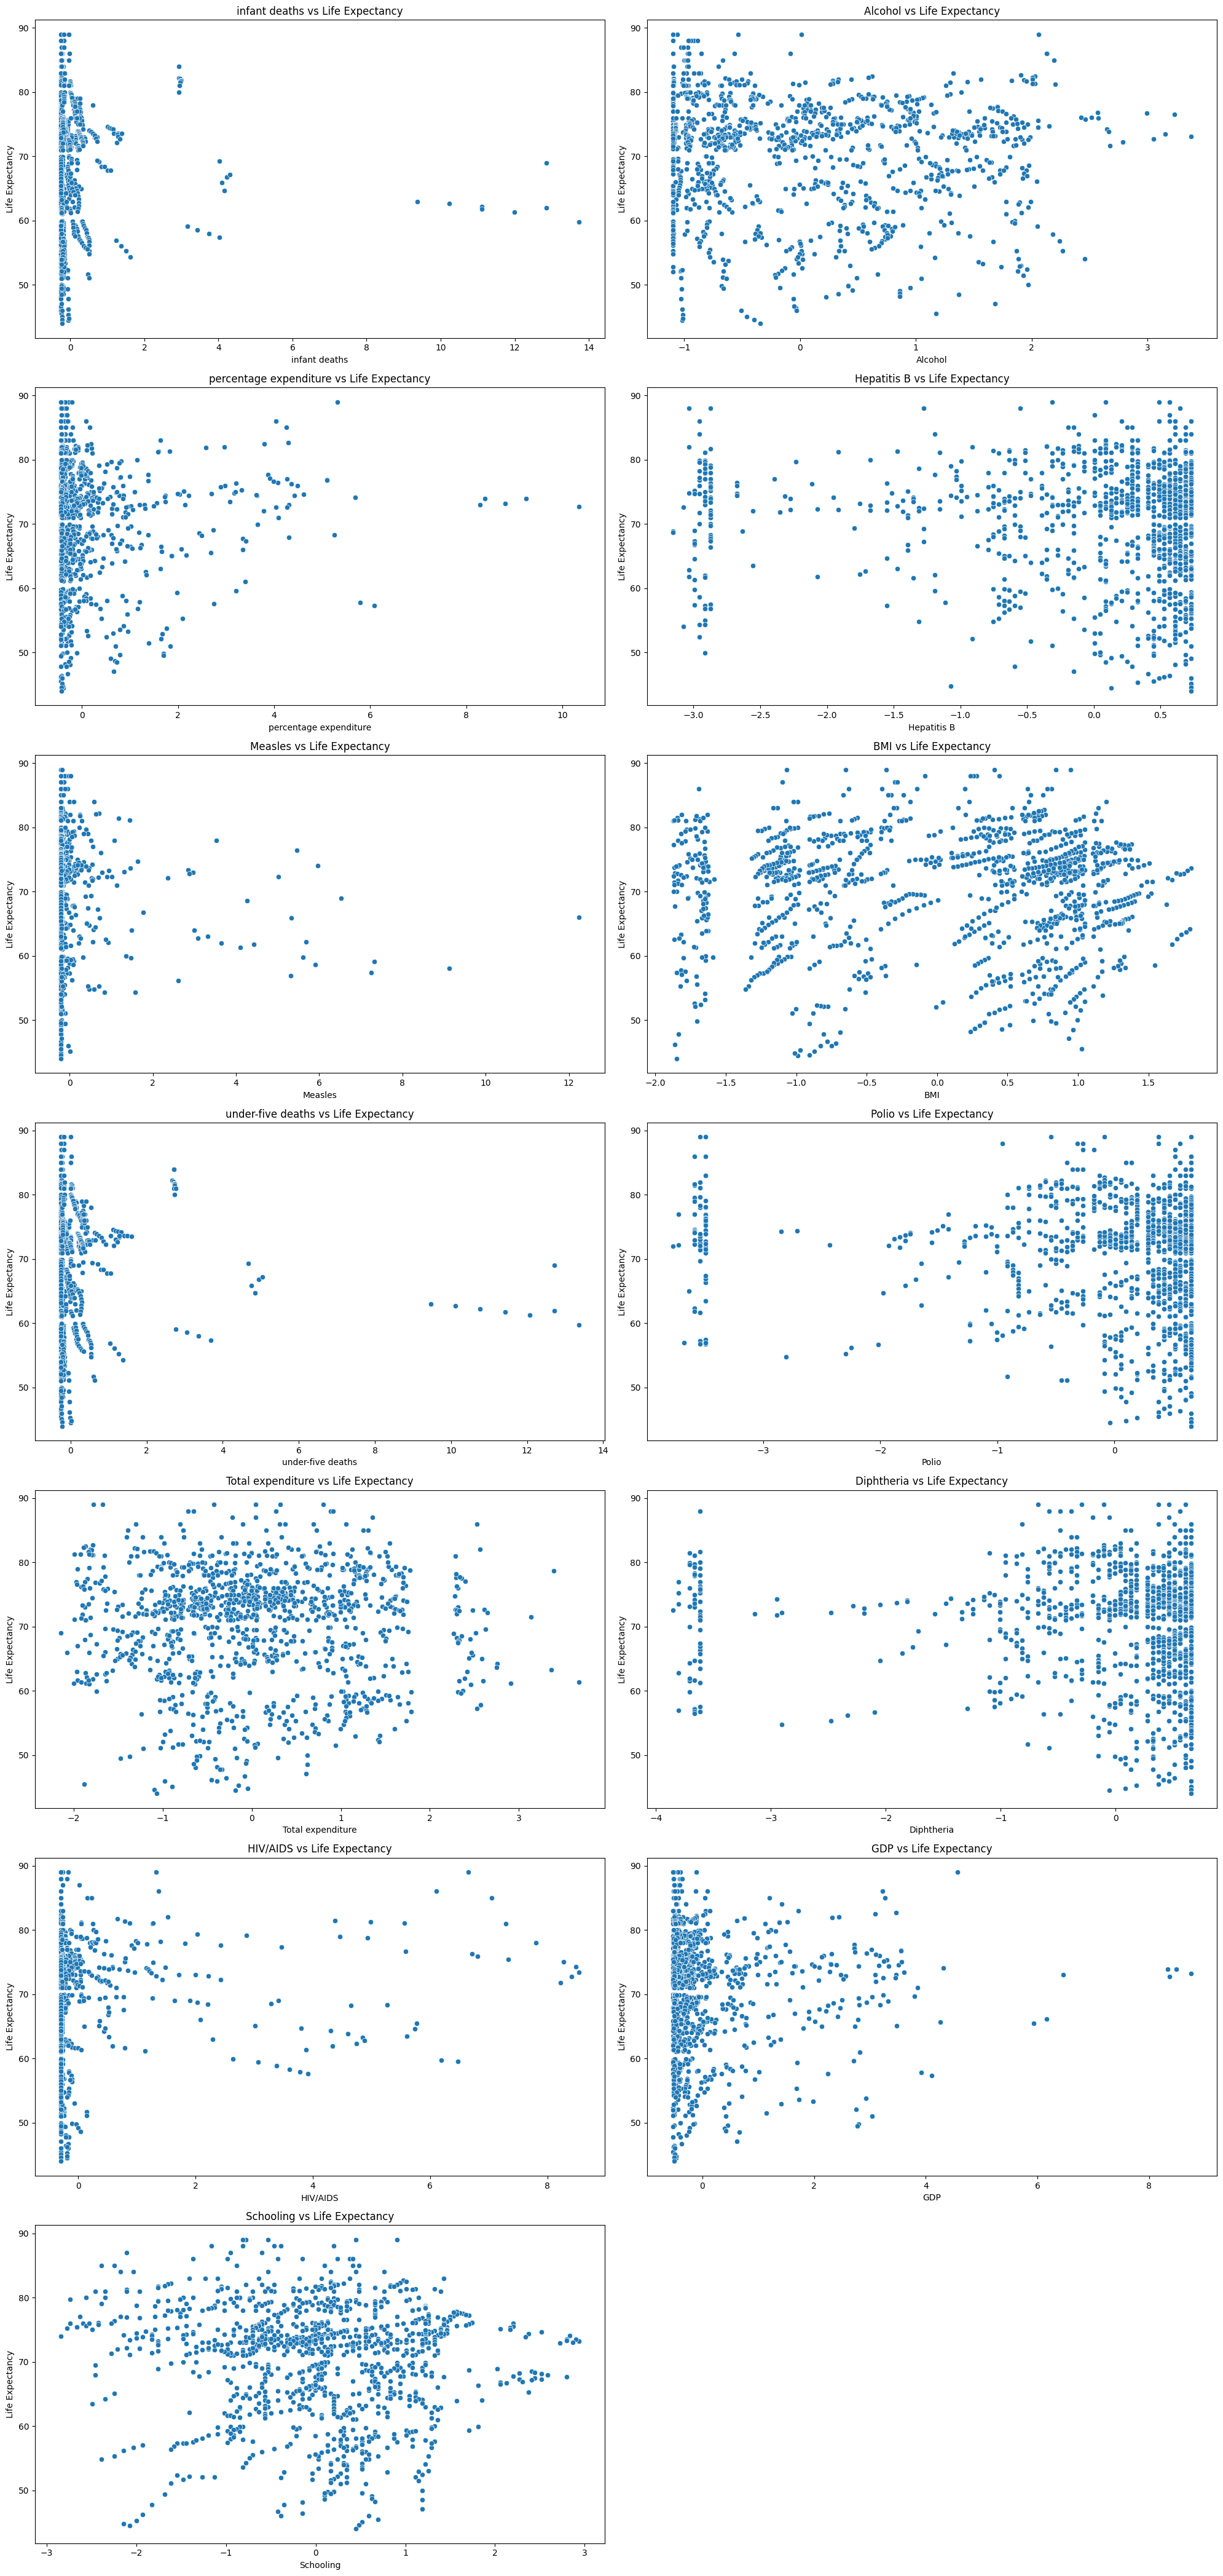

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of rows/columns for the subplots
n_columns = len(input.columns)
n_rows = n_columns // 2 + (n_columns % 2)

# Set the size of the overall figure
plt.figure(figsize=(20, 6 * n_rows))

for i, column in enumerate(input.columns):
    # Create a subplot for each column
    plt.subplot(n_rows, 2, i + 1)
    sns.scatterplot(x=input[column], y=output)
    plt.title(f'{column} vs Life Expectancy')
    plt.xlabel(column)
    plt.ylabel('Life Expectancy')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('prelim_data_vs.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression

def split_train_test(feature_data, output, training_partition):
    """
    Splits the given data into random test and training sets of specified relative sizes

    Parameters:
    - feature_data (np.array): the design matrix containing all data
    - training_partition (float): the relative size of the training datapoints

    Returns:
    - tuple: the randomized and separated training and test inputs and outputs
    """
    feature_data = np.array(feature_data)
    output = np.array(output)
    # print(input)
    # Randomize indices to shuffle the inputs and outputs
    shuffle_indices = np.arange(len(feature_data[0]))
    random.shuffle(shuffle_indices)
    
    # Randomize the order of the input and output data using the indeces above (input transposed to keep data consistent)
    input_data = feature_data.T[shuffle_indices]
    output_data = output[shuffle_indices]

    # Calculate the relative size of the training set and apply it to the input and output data
    split = int(len(input_data)*training_partition)

    training_inputs = input_data[:split]
    training_outputs = output_data[:split]
    test_inputs = input_data[split:]
    test_outputs = output_data[split:]

    return training_inputs, training_outputs, test_inputs, test_outputs

useful_columns = [
    'Hepatitis B', 'Polio', 'Total expenditure', 'Schooling', 'BMI',
]
train_in, train_out, test_in, test_out = split_train_test(data[useful_columns].T, data["Life expectancy"], .8)

print(train_out.shape)
print(test_out.shape)
print(train_in.shape)
print(test_in.shape)

(1482,)
(371,)
(1482, 5)
(371, 5)


## Preliminary Testing

In [5]:
reg_BMI_GDP = LinearRegression().fit(train_in, train_out)
results = reg_BMI_GDP.score(test_in, test_out)
print(results)

0.5252041271099542
